<Figure size 1200x800 with 0 Axes>

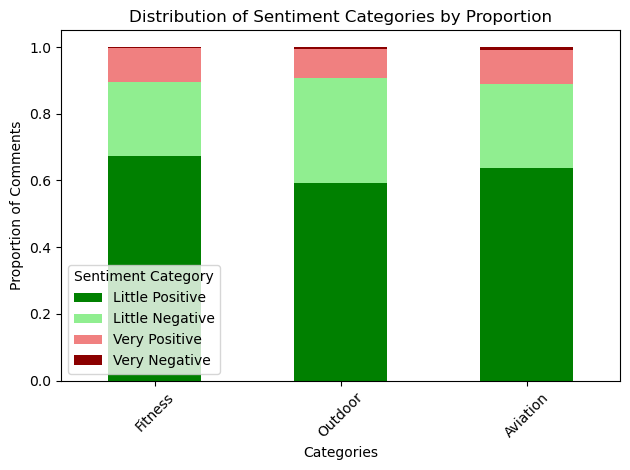

In [2]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

with open('/Users/luolan/Desktop/Fitness_Garmin_Document.txt', 'r', encoding='utf-8') as file:
    comments_fitness = file.read().split('\n')

with open('/Users/luolan/Desktop/Outdoor_Garmin_Document.txt', 'r', encoding='utf-8') as file:
    comments_outdoor = file.read().split('\n')

with open('/Users/luolan/Desktop/Aviation_Garmin_Document.txt', 'r', encoding='utf-8') as file:
    comments_aviation = file.read().split('\n')

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text)  
    text = text.lower() 
    return text

cleaned_fitness = [clean_text(comment) for comment in comments_fitness if comment.strip()]
cleaned_outdoor = [clean_text(comment) for comment in comments_outdoor if comment.strip()]
cleaned_aviation = [clean_text(comment) for comment in comments_aviation if comment.strip()]

def get_sentiment(text):
    analysis = TextBlob(text)
    score = analysis.sentiment.polarity 
    return score


def create_sentiment_data(cleaned_comments):
    sentiments = [get_sentiment(comment) for comment in cleaned_comments]
    df = pd.DataFrame({
        'Comment': cleaned_comments,
        'Sentiment Score': sentiments,
    })
    
    def classify_sentiment(score):
        if score > 0.5:
            return 'Very Positive'
        elif score > 0:
            return 'Little Positive'
        elif score > -0.5:
            return 'Little Negative'
        else:
            return 'Very Negative'

    df['Sentiment Category'] = df['Sentiment Score'].apply(classify_sentiment)
    return df

df_fitness = create_sentiment_data(cleaned_fitness)
df_outdoor = create_sentiment_data(cleaned_outdoor)
df_aviation = create_sentiment_data(cleaned_aviation)


def get_sentiment_proportions(df):
    category_counts = df['Sentiment Category'].value_counts()
    return category_counts / category_counts.sum()

proportions_fitness = get_sentiment_proportions(df_fitness)
proportions_outdoor = get_sentiment_proportions(df_outdoor)
proportions_aviation = get_sentiment_proportions(df_aviation)


data = {
    'Fitness': proportions_fitness,
    'Outdoor': proportions_outdoor,
    'Aviation': proportions_aviation,

}

df_combined = pd.DataFrame(data).fillna(0)

plt.figure(figsize=(12, 8))

df_combined.T.plot(kind='bar', stacked=True, color=['green', 'lightgreen', 'lightcoral', 'darkred'])

plt.xlabel("Categories")
plt.ylabel("Proportion of Comments")
plt.title("Distribution of Sentiment Categories by Proportion")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
